# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | kone
Processing Record 4 of Set 1 | mezgor'e
City not found. Skipping...
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | makushino
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | howard springs
Processing Record 16 of Set 1 | belvedere marittimo
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | dubove
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | gebeit
Pr

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,37.49,88,64,2.71,GL,1722884042
1,blackmans bay,-43.0167,147.3167,50.74,74,100,1.99,AU,1722884043
2,kone,-21.0595,164.8658,58.03,78,8,3.67,NC,1722884044
3,puerto natales,-51.7236,-72.4875,34.25,86,40,2.30,CL,1722883853
4,makushino,55.2103,67.2442,64.22,84,100,7.38,RU,1722884047


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,37.49,88,64,2.71,GL,1722884042
1,blackmans bay,-43.0167,147.3167,50.74,74,100,1.99,AU,1722884043
2,kone,-21.0595,164.8658,58.03,78,8,3.67,NC,1722884044
3,puerto natales,-51.7236,-72.4875,34.25,86,40,2.30,CL,1722883853
4,makushino,55.2103,67.2442,64.22,84,100,7.38,RU,1722884047


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

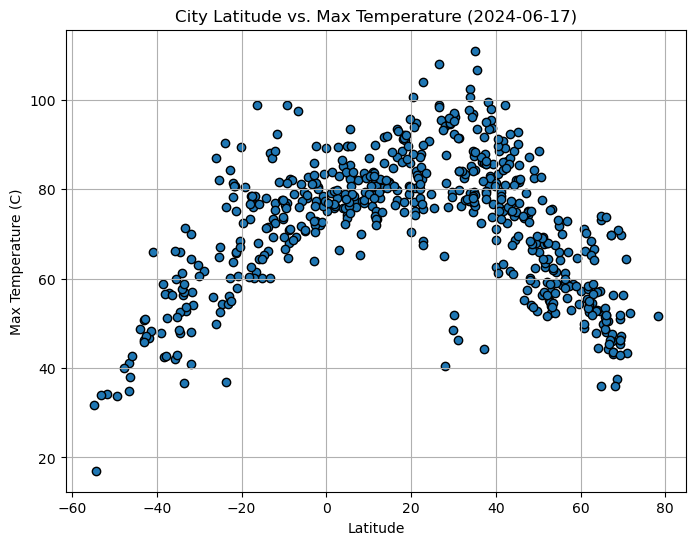

In [56]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black",  marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

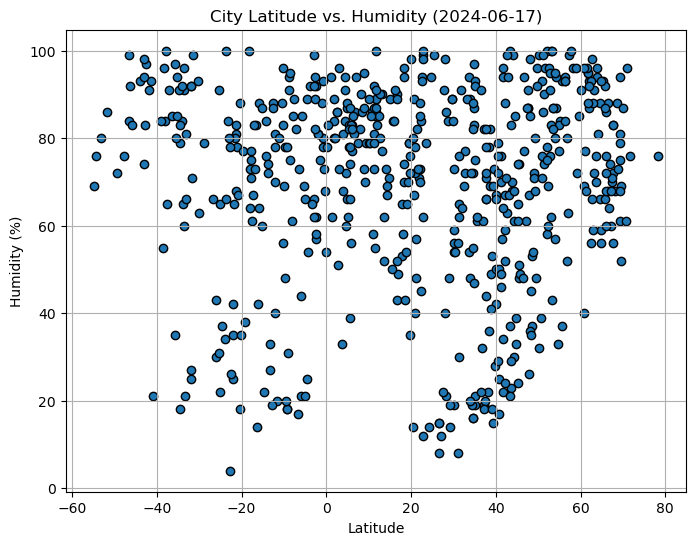

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

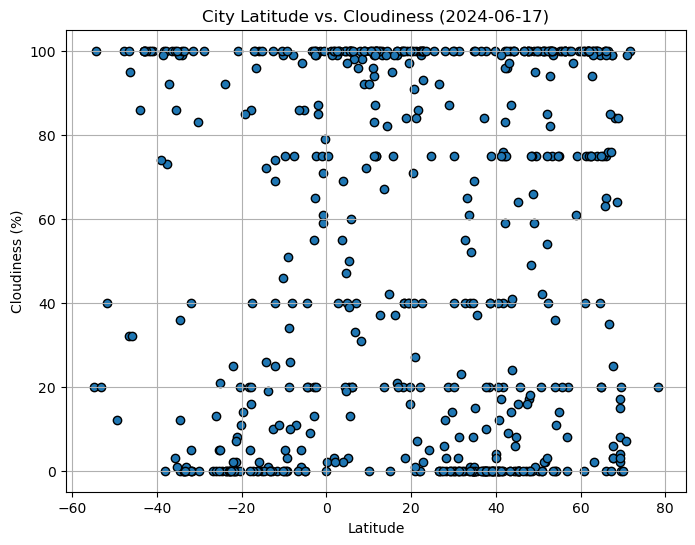

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

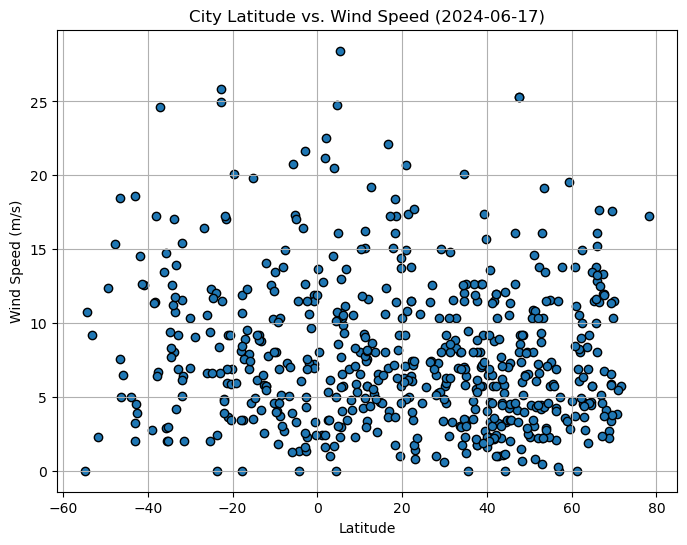

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [236]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * np.array(x_values) + intercept    

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", marker="o", label="Cities")
    plt.plot(x_values, regress_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f} (r²={r_value**2:.2f})")
    
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}', 
                 xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

In [238]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,37.49,88,64,2.71,GL,1722884042
4,makushino,55.2103,67.2442,64.22,84,100,7.38,RU,1722884047
5,hamilton,39.1834,-84.5333,93.78,53,0,9.22,US,1722884048
7,udachny,66.4167,112.4000,50.56,88,100,17.65,RU,1722884050
8,albany,42.6001,-73.9662,86.36,63,96,1.01,US,1722883851


In [240]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,50.74,74,100,1.99,AU,1722884043
2,kone,-21.0595,164.8658,58.03,78,8,3.67,NC,1722884044
3,puerto natales,-51.7236,-72.4875,34.25,86,40,2.30,CL,1722883853
6,port elizabeth,-33.9180,25.5701,56.32,65,0,8.05,ZA,1722884049
10,puerto ayora,-0.7393,-90.3518,76.96,78,59,11.90,EC,1722884053


###  Temperature vs. Latitude Linear Regression Plot

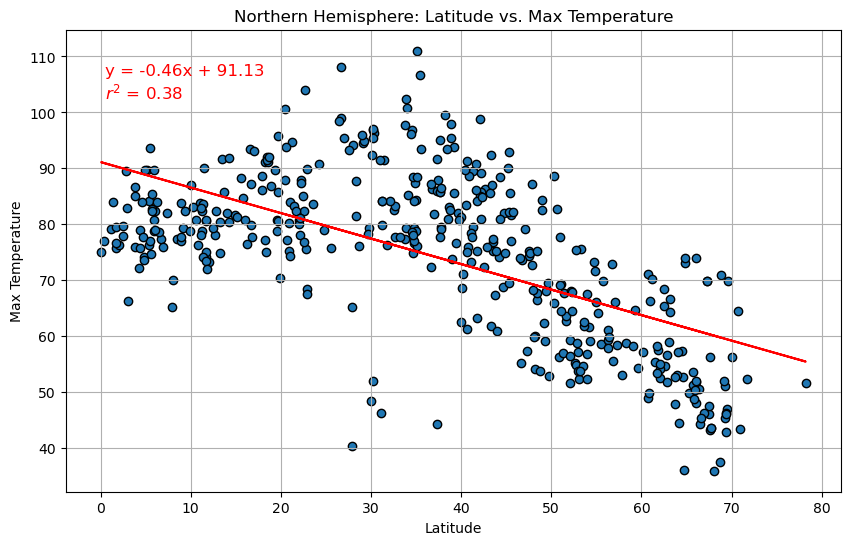

In [243]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature",
    "Northern Hemisphere: Latitude vs. Max Temperature",
    "output_data/NH_Fig1_LR.png"
)

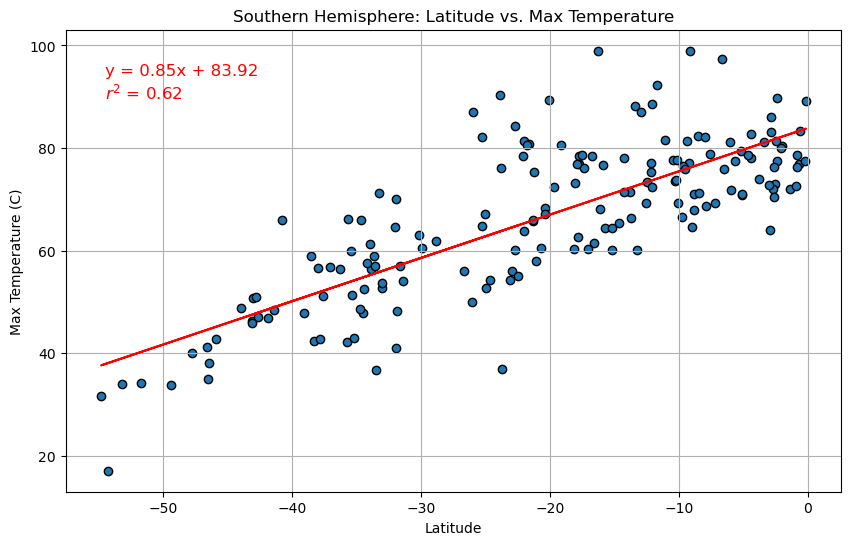

In [246]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (C)",
    "Southern Hemisphere: Latitude vs. Max Temperature",
    "output_data/SH_Fig1_LR.png"
)

**Discussion about the linear relationship:** Based on these two graphs I can interpret that as one moves north, the temperature goes down. And as one moves south the temperature goes up. 

### Humidity vs. Latitude Linear Regression Plot

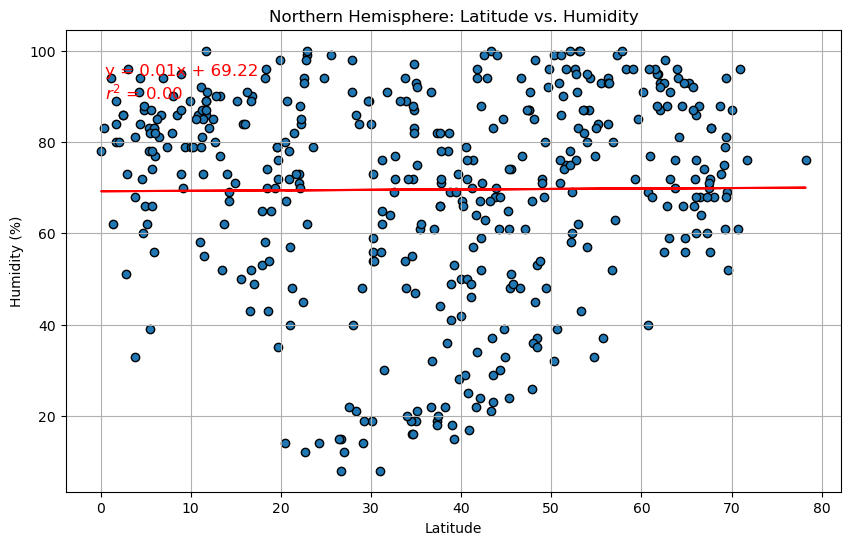

In [248]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere: Latitude vs. Humidity",
    "output_data/NH_Fig2_LR.png"
)

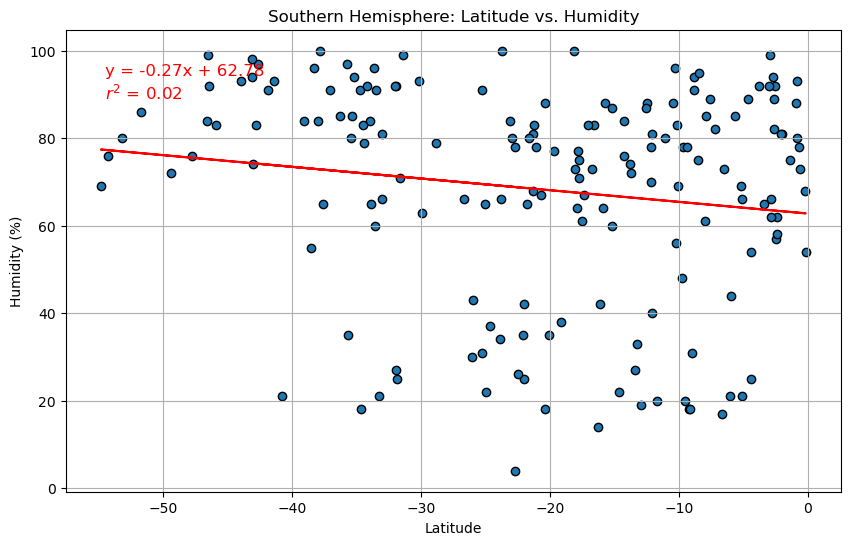

In [250]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere: Latitude vs. Humidity",
    "output_data/SH_Fig2_LR.png"
)

**Discussion about the linear relationship:** The humidity in the northern hemisphere has a slight change but is very minimal. This suggest that the latitude does not have a huuge effect on humidity. However, the southern hemisphere has a noticable negative slope which suggests that the increase in latitude may effect the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

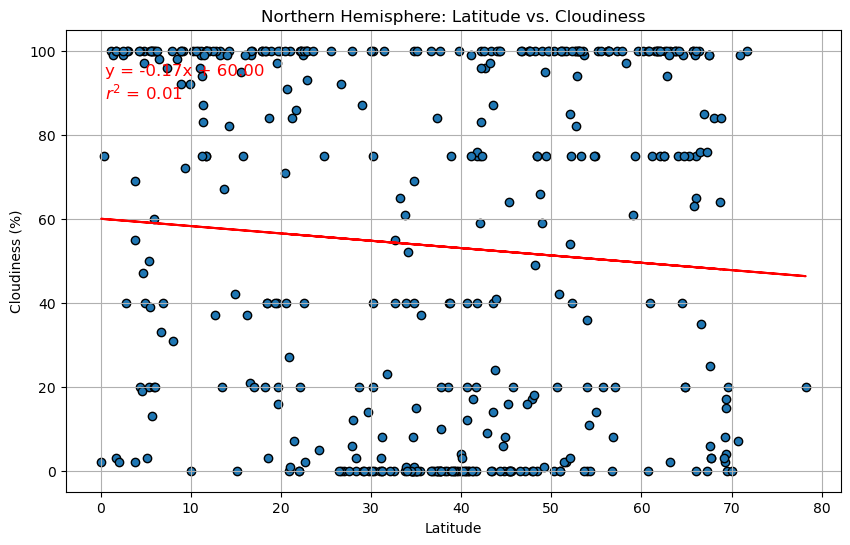

In [252]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere: Latitude vs. Cloudiness",
    "output_data/NH_Fig3_LR.png"
)

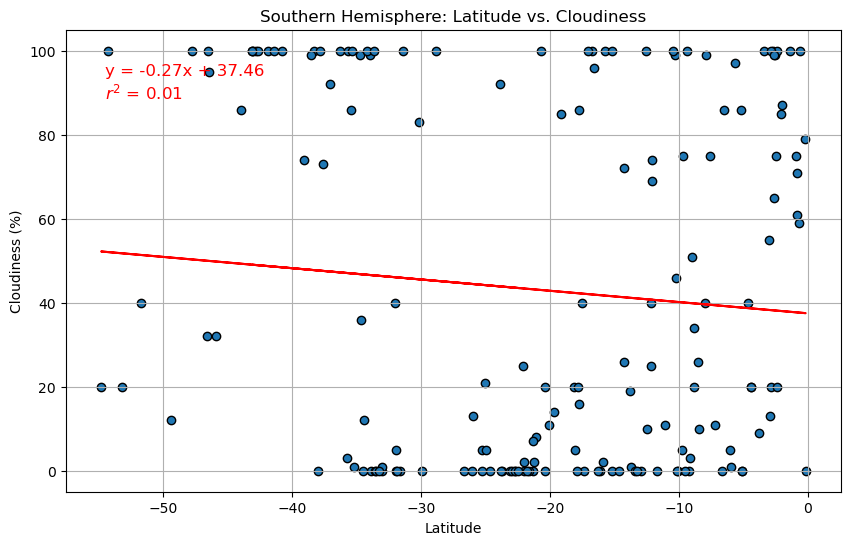

In [254]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere: Latitude vs. Cloudiness",
    "output_data/SH_Fig3_LR.png"
)

**Discussion about the linear relationship:** Both hemispheres have a negative slope which indicate that an increase in latitude may have an effect on the cloudiness between the two hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

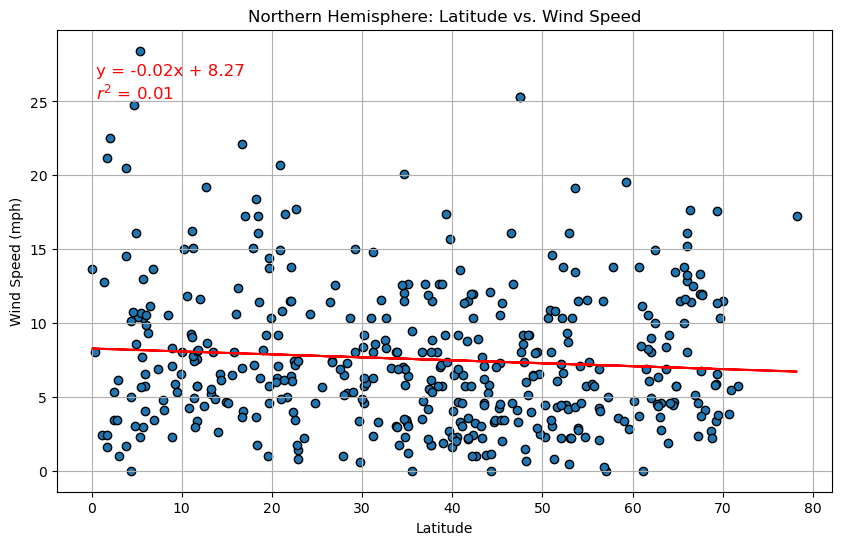

In [256]:
# Northern HemisphereS
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (mph)",
    "Northern Hemisphere: Latitude vs. Wind Speed",
    "output_data/NH_Fig4_LR.png"
)

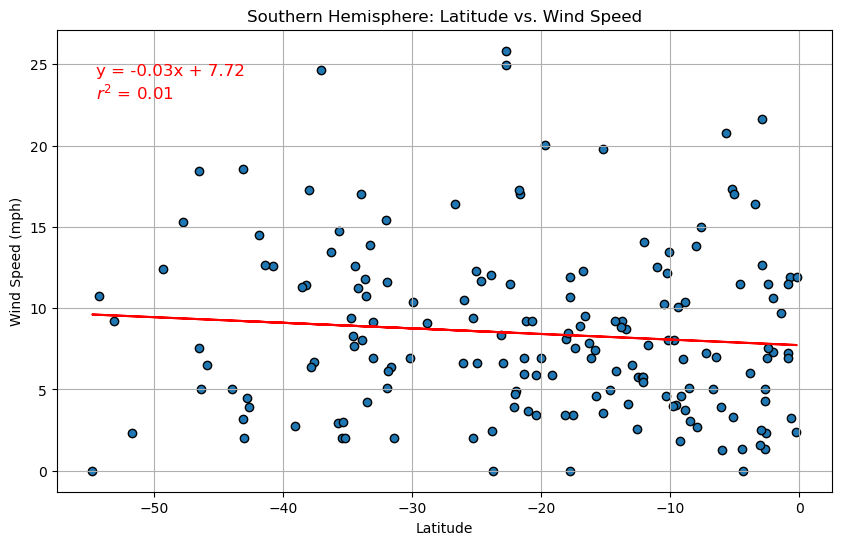

In [258]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (mph)",
    "Southern Hemisphere: Latitude vs. Wind Speed",
    "output_data/SH_Fig4_LR.png"
)

**Discussion about the linear relationship:** Both the slopes have a slight decrease which means the increase in latitude has an effect on the wind speeds. 